# Graph abstraction using PAGA
Pijuan-Sala, B., Griffiths, J.A., Guibentif, C., et al.

05 September 2018

In [1]:
exec(open('/Users/ricard/gastrulation10x/settings.py').read())

/Users/ricard/anaconda3/envs/base_new/lib/python3.6/site-packages/anndata/compat/__init__.py:161: FutureWarning: Moving element from .uns['neighbors']['distances'] to .obsp['distances'].

This is where adjacency matrices should go now.
  FutureWarning,
/Users/ricard/anaconda3/envs/base_new/lib/python3.6/site-packages/anndata/compat/__init__.py:161: FutureWarning: Moving element from .uns['neighbors']['connectivities'] to .obsp['connectivities'].

This is where adjacency matrices should go now.
  FutureWarning,


In [2]:
sc.settings.verbosity = 3  # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.settings.set_figure_params(dpi=80, frameon=False, figsize=(5, 5), facecolor='white')
# sc.logging.print_versions()

In [48]:
a = metadata.loc[:,["cell","celltype"]]
b = adata.obs.loc[:,["celltype"]].reset_index().rename(columns={"index":"cell"})
ab = pd.merge(left=a, right=b, how="left", left_on="cell", right_on="cell")
ab.head()

,cell,celltype_x,celltype_y
0,cell_1,Epiblast,Epiblast
1,cell_10,Epiblast,Epiblast
2,cell_100,Epiblast,Epiblast
3,cell_1000,Caudal_epiblast,Early paraxial mesoderm
4,cell_10000,Rostral_neurectoderm,Early neurectoderm


In [55]:
adata.obs.index

Index(['cell_1', 'cell_2', 'cell_5', 'cell_6', 'cell_8', 'cell_9', 'cell_10',
       'cell_11', 'cell_12', 'cell_13',
       ...
       'cell_139321', 'cell_139322', 'cell_139323', 'cell_139324',
       'cell_139325', 'cell_139326', 'cell_139327', 'cell_139329',
       'cell_139330', 'cell_139331'],
      dtype='object', name='index', length=116312)

In [13]:
adata.obs.head()

,sample,stage,batch,theiler,doub.density,doublet,cluster,clustersub,clusterstage,clustertheiler,...,clusterIdx,clustercat,clusterSubUnique,Umap1,Umap2,tsne1,tsne2,clustertsne,celltype,clusterMergedHierarchy
index,,,,,,,,,,,,,,,,,,,,,
cell_1,1,E6.5,1,TS9,0.043114,False,2.0,4.0,2.0,3.0,...,1.0,cluster2.0,24,-10.227546,-2.881687,12.026999,10.129670,2,Epiblast,20
cell_2,1,E6.5,1,TS9,1.129713,False,12.0,1.0,1.0,1.0,...,11.0,cluster12.0,121,-6.625458,0.108961,8.522153,3.586688,12,Primitive Streak,120
cell_5,1,E6.5,1,TS9,0.112121,False,3.0,7.0,4.0,6.0,...,2.0,cluster3.0,37,10.061009,-0.029313,16.159563,-9.778154,3,ExE ectoderm 2,30
cell_6,1,E6.5,1,TS9,1.254709,False,1.0,1.0,3.0,7.0,...,0.0,cluster1.0,11,-10.454418,-0.269452,19.083109,12.684784,1,Epiblast,10
cell_8,1,E6.5,1,TS9,1.345759,False,2.0,1.0,2.0,3.0,...,1.0,cluster2.0,21,-11.047206,-2.205269,13.372303,12.175641,2,Epiblast,20


In [14]:
adata.var.head()

""
index
ENSMUSG00000051951
ENSMUSG00000089699
ENSMUSG00000102343
ENSMUSG00000025900
ENSMUSG00000025902


In [3]:
adata.obsm.keys()

KeysView(AxisArrays with keys: X_pca, X_umap, X_tsne, X_diffmap)

In [6]:
colPalette_celltypes = [opts["celltype_colors"][i.replace(" ","_")] for i in sorted(np.unique(adata.obs['celltype']))]
adata.uns['celltype_colors'] = colPalette_celltypes

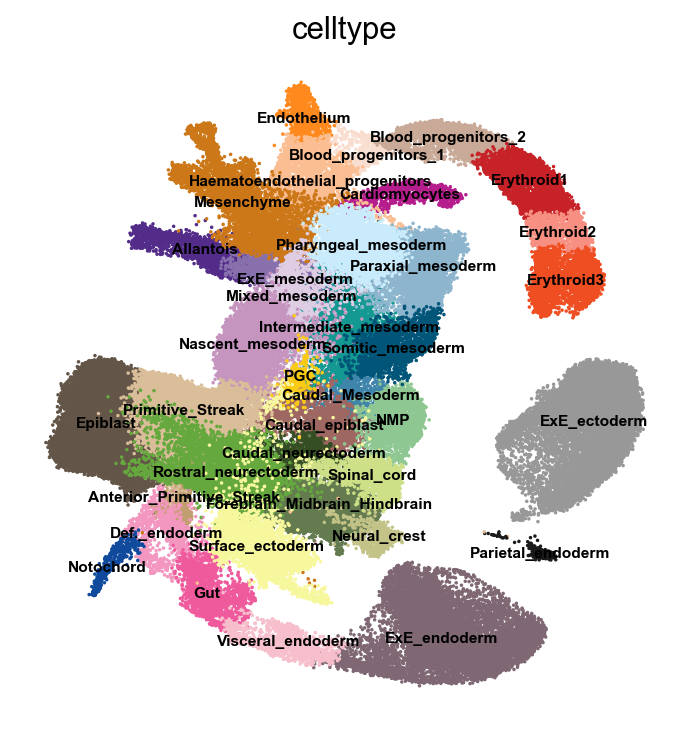

In [16]:
sc.pl.scatter(adata, color='celltype', basis="umap", size=10, legend_loc='on data', legend_fontsize=7)


In [ ]:
adata_subset = adata[adata.obs["stage"]!="mixed_gastrulation"]

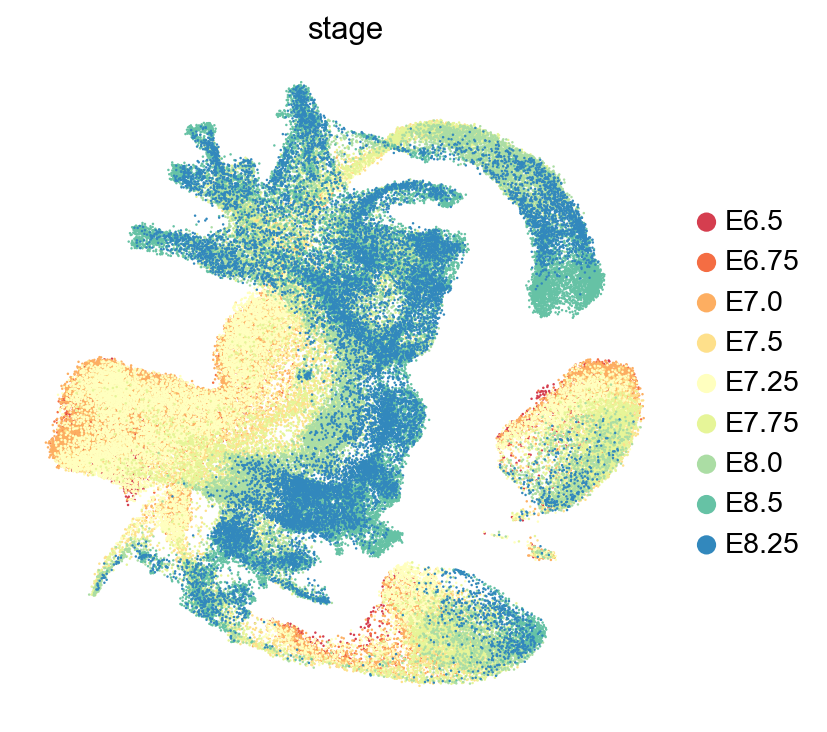

In [31]:
sc.pl.scatter(adata_subset, color='stage', basis="umap", size=5, legend_loc='right margin')

In [47]:
sc.pp.neighbors(adata, n_neighbors=15, use_rep='X_umap')

computing neighbors
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:41)


In [48]:
adata.obsp["connectivities"].shape
adata.uns["neighbors"]["connectivities"].shape
adata.uns["neighbors"]["params"]

/Users/ricard/anaconda3/envs/base_new/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: This location for 'connectivities' is deprecated. It has been moved to .obsp[connectivities], and will not be accesible here in a future version of anndata.
  


{'n_neighbors': 15,
 'method': 'umap',
 'metric': 'euclidean',
 'use_rep': 'X_umap'}

In [49]:
sc.tl.paga(adata, groups='celltype')

running PAGA
    finished: added
    'paga/connectivities', connectivities adjacency (adata.uns)
    'paga/connectivities_tree', connectivities subtree (adata.uns) (0:00:09)


## Plotting graph abstraction

--> added 'pos', the PAGA positions (adata.uns['paga'])


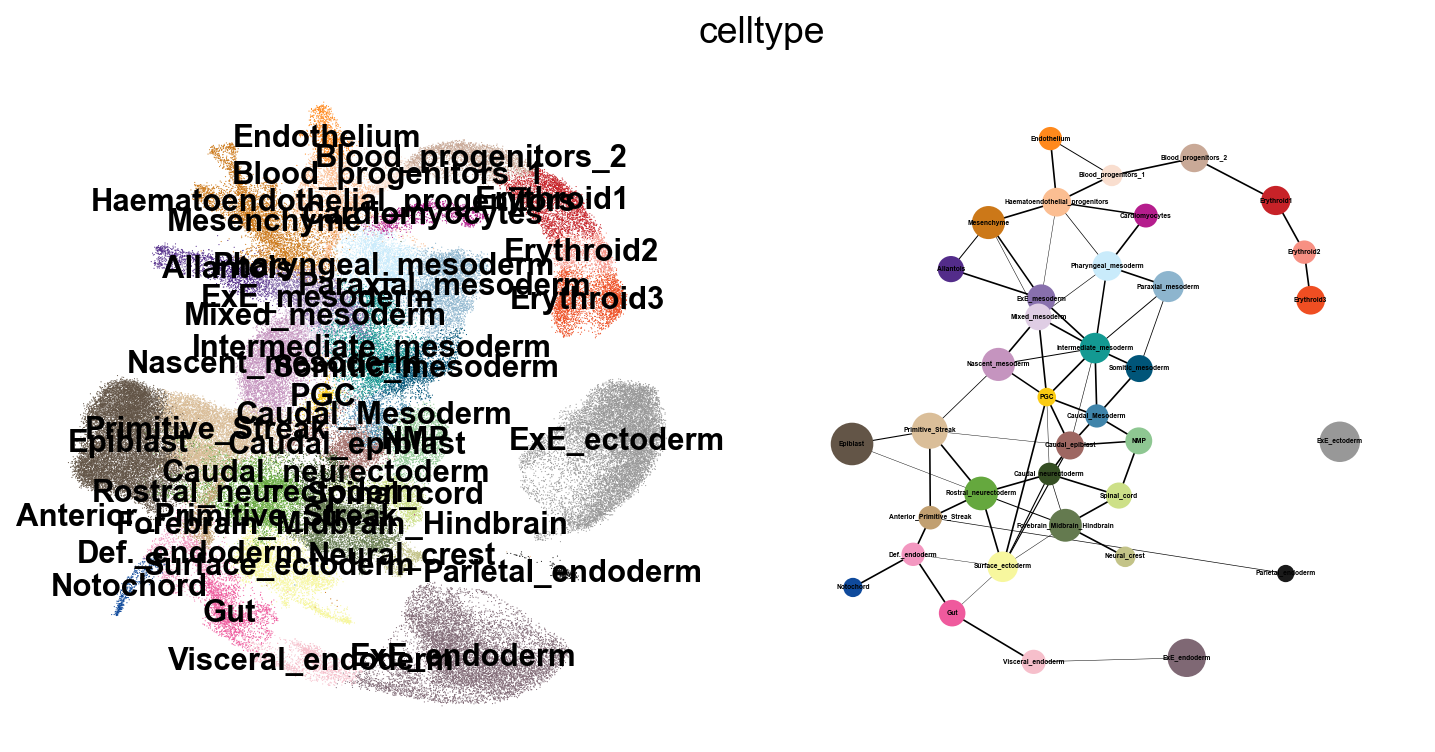

In [51]:
sc.pl.paga_compare(adata, basis='umap',legend_loc='on data',
                   fontsize=3, threshold=0.23, color='celltype', edge_width_scale=0.1)

--> added 'pos', the PAGA positions (adata.uns['paga'])


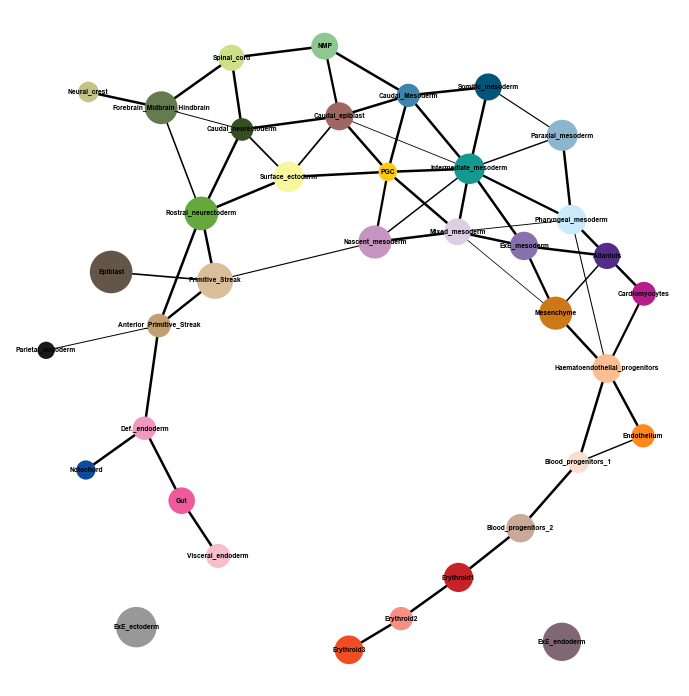

In [50]:
sc.pl.paga(adata, threshold=0.3, fontsize=3, edge_width_scale=0.15,
           node_size_power=0.5, color='celltype')

# Dendrogram

In [61]:
from scipy import cluster
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (12, 5)

In [ ]:
mat = adata.uns['paga']['connectivities'].todense()
labels = np.unique(adata.obs['celltype'])
matdist = 1-mat

np.fill_diagonal(matdist,0)

## Ward linkage

/Users/ricard/anaconda3/envs/base_new/lib/python3.6/site-packages/ipykernel_launcher.py:1: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  """Entry point for launching an IPython kernel.


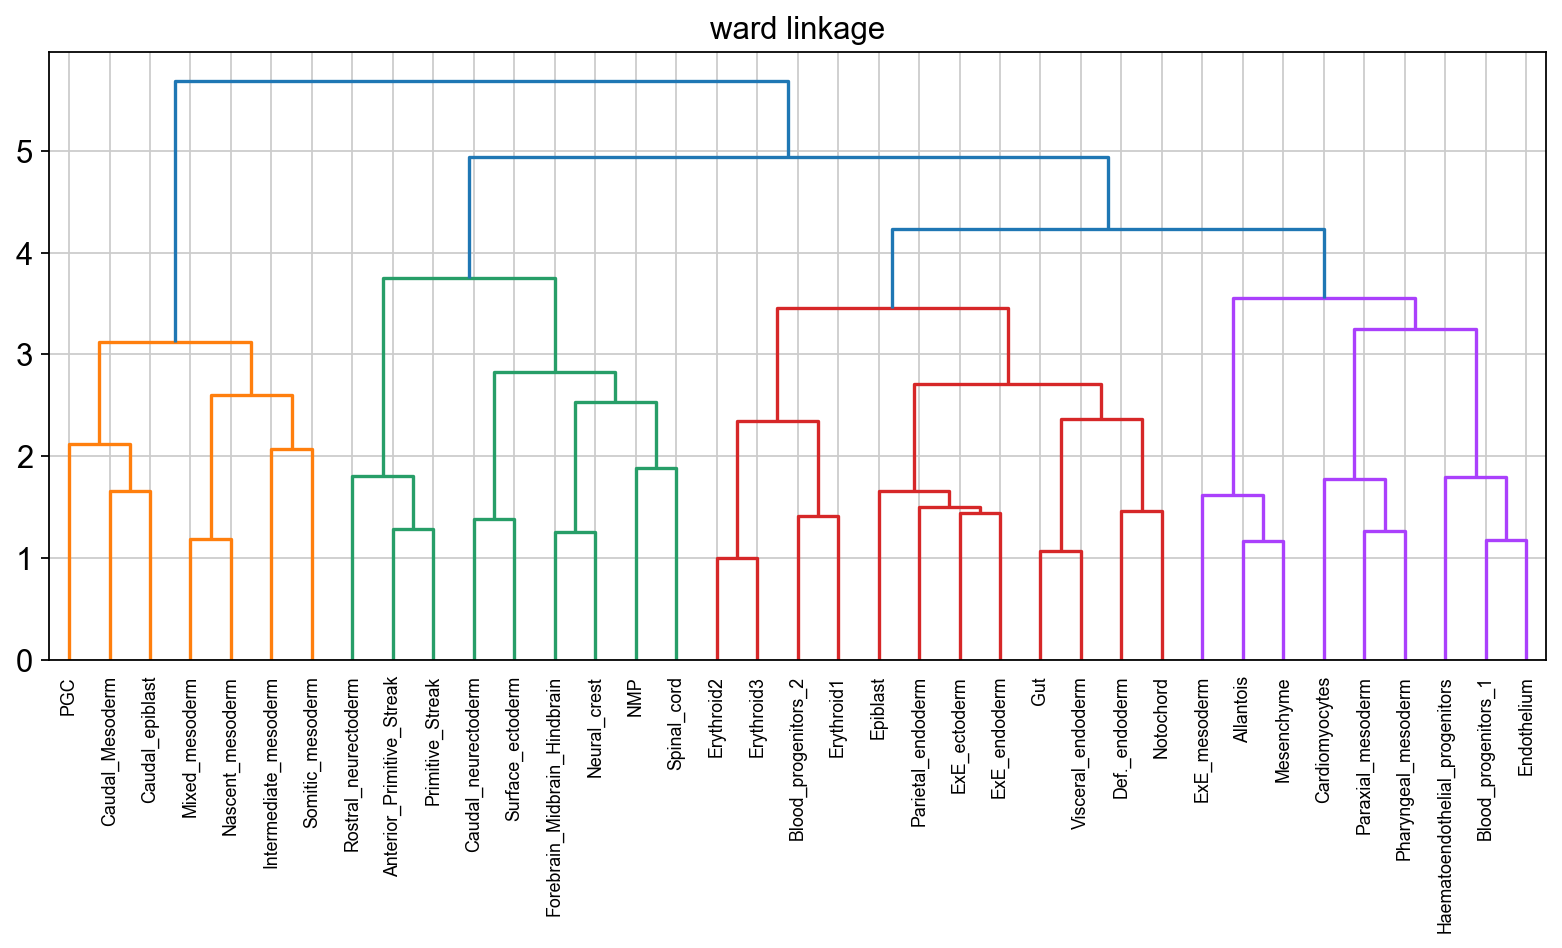

In [62]:
lk = linkage(matdist, "ward")
cutree = cluster.hierarchy.cut_tree(lk, height=thres)

den = dendrogram(lk, labels=labels, leaf_rotation=90)
plt.title('ward linkage')
plt.grid(True)

## Average linkage

/Users/ricard/anaconda3/envs/base_new/lib/python3.6/site-packages/ipykernel_launcher.py:1: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  """Entry point for launching an IPython kernel.


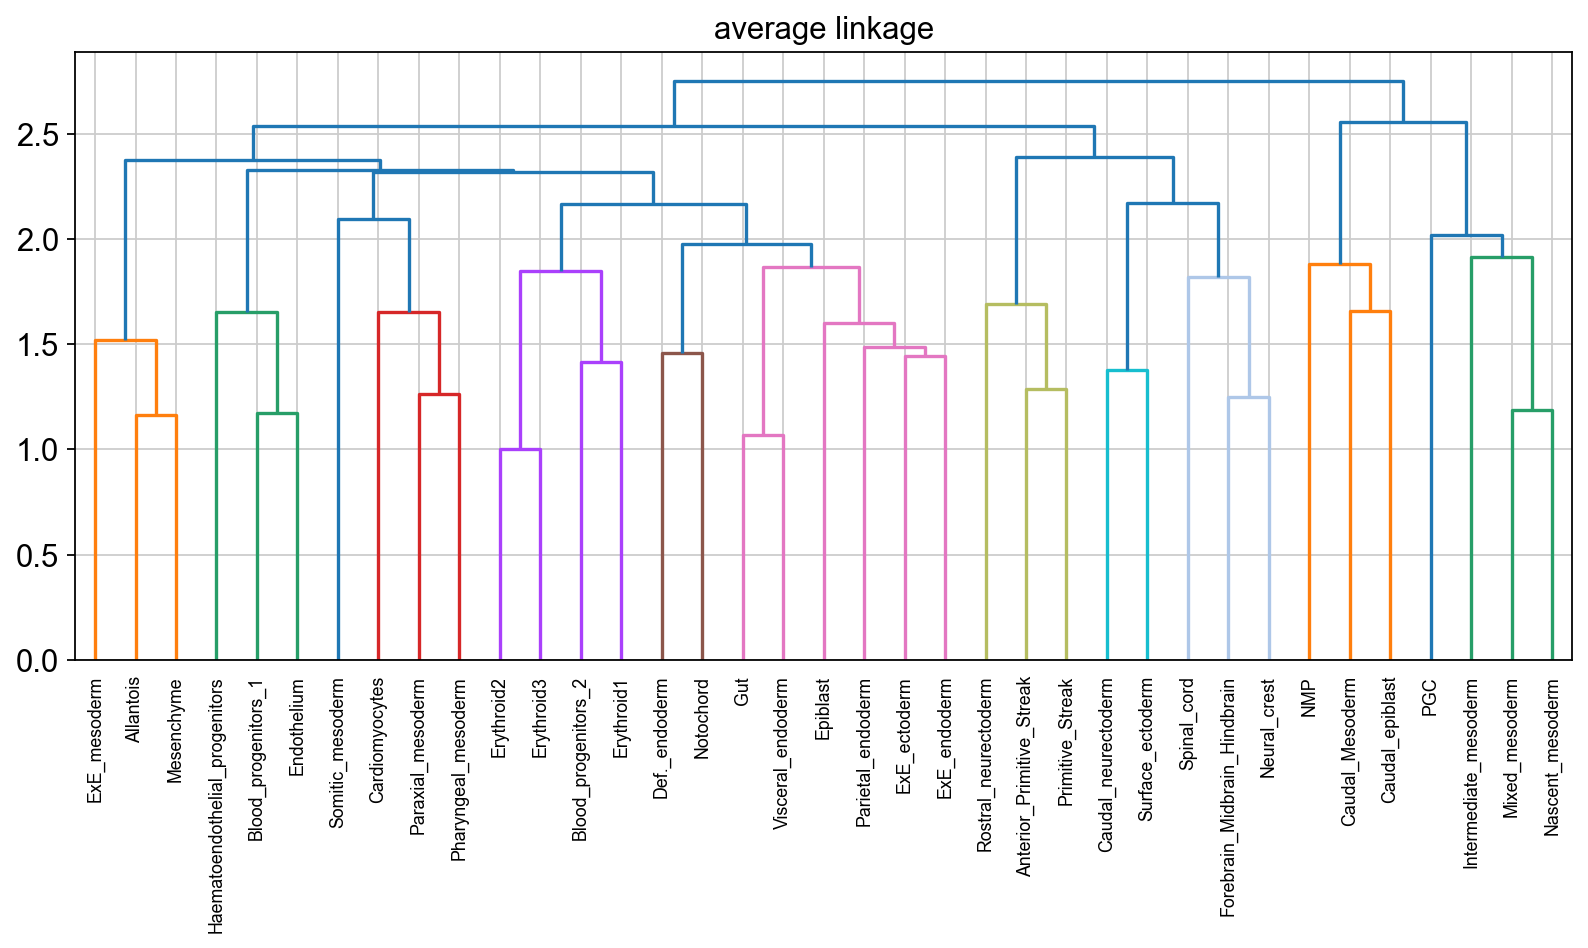

In [63]:
lk = linkage(matdist, "average")
cutree = cluster.hierarchy.cut_tree(lk, height=thres)

den = dendrogram(lk, labels=labels, leaf_rotation=90)
plt.title('average linkage')
plt.grid(True)

## Single linkage

/Users/ricard/anaconda3/envs/base_new/lib/python3.6/site-packages/ipykernel_launcher.py:1: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  """Entry point for launching an IPython kernel.


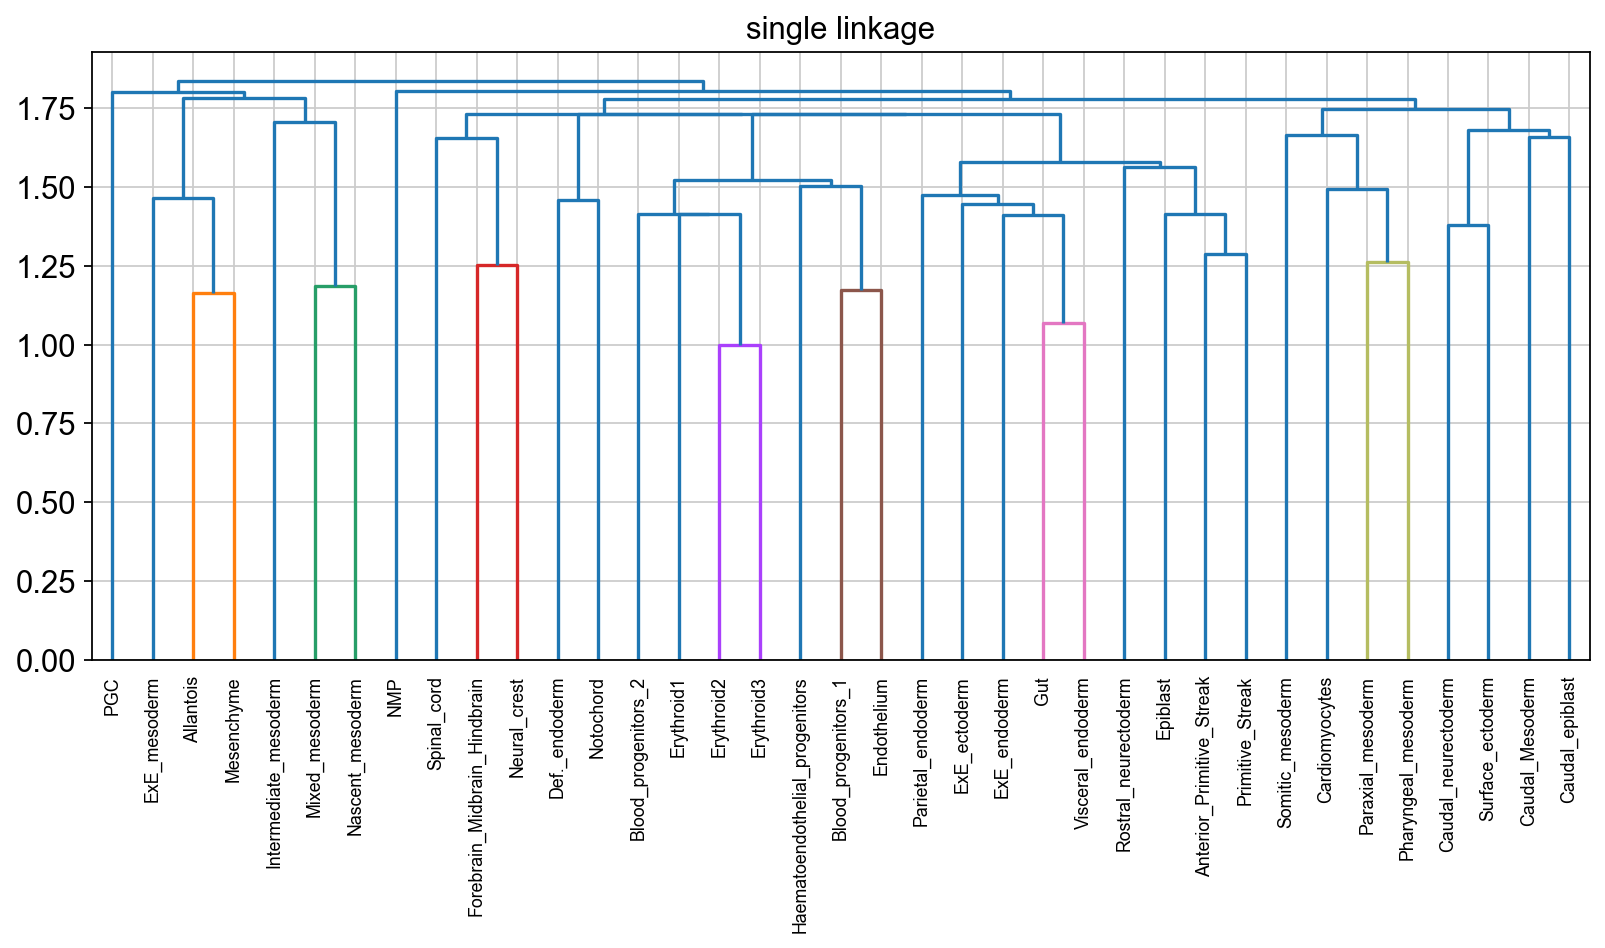

In [64]:
lk = linkage(matdist, "single")
cutree = cluster.hierarchy.cut_tree(lk, height=thres)

den = dendrogram(lk, labels=labels, leaf_rotation=90)
plt.title('single linkage')
plt.grid(True)

## Centroid linkage

/Users/ricard/anaconda3/envs/base_new/lib/python3.6/site-packages/ipykernel_launcher.py:1: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  """Entry point for launching an IPython kernel.


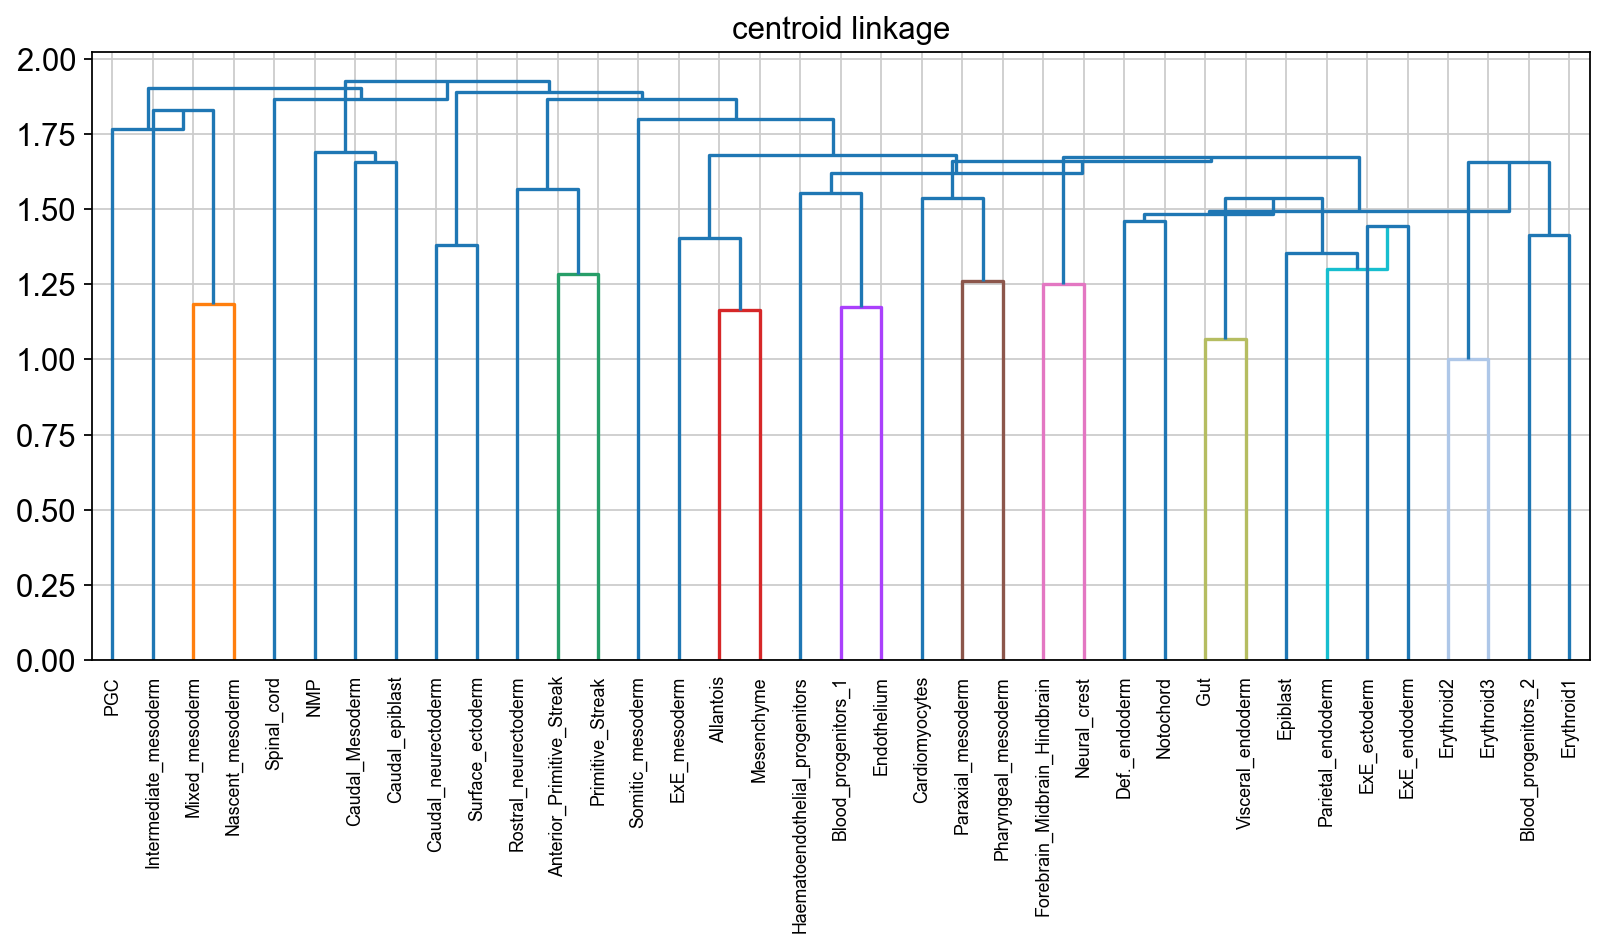

In [65]:
lk = linkage(matdist, "centroid")
# cutree = cluster.hierarchy.cut_tree(lk)

den = dendrogram(lk,labels=labels,leaf_rotation=90)
plt.title('centroid linkage')
plt.grid(True)